In [109]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score


from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

train_df = pd.read_csv('C:/Users/Harshinee/Desktop/Eunoia-Mental-Health-Awareness-in-Workplace-Environment/survey.csv')

print(train_df.shape)
print(train_df.describe())
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
welln

In [110]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
benefits                       0  0.000000
Age                            0  0.000000
Gender                         0  0.000000
Country                        0  0.000000
family_history                 0  0.000000
treatment                      0  0.000000
no_employees                   0  0.000000
remote_work                    0  0.000000
tech_company                   0  0.000000
care_options                   0  0.000000
obs_consequence                0  0.000000
wellness_program               0  0.000000
seek_help                      0  0.000000
anonymity                      0  0.000000
leave                          0  0.000000
mental_health_consequence      0  0.000000
phys_health_consequence        0  0.000000
coworkers                      0  0.000000
supervisor 

In [111]:
train_df = train_df.drop(['comments'], axis= 1)
train_df = train_df.drop(['state'], axis= 1)
train_df = train_df.drop(['Timestamp'], axis= 1)
train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,25-Jun,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,25-Jun,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [112]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)   

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,25-Jun,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,25-Jun,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [113]:
gender = train_df['Gender'].str.lower()
gender = train_df['Gender'].unique()
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]
print(train_df['Gender'].unique())

['female' 'male' 'trans']


In [114]:
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [115]:
train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [82]:
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

train_df.head()

label_Age [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
label_Gender [0, 1, 2]
label_self_employed [0, 1]
label_family_history [0, 1]
label_treatment [0, 1]
label_work_interfere [0, 1, 2, 3, 4]
label_no_employees [0, 1, 2, 3, 4, 5]
label_remote_work [0, 1]
label_tech_company [0, 1]
label_benefits [0, 1, 2]
label_care_options [0, 1, 2]
label_wellness_program [0, 1, 2]
label_seek_help [0, 1, 2]
label_anonymity [0, 1, 2]
label_leave [0, 1, 2, 3, 4]
label_mental_health_consequence [0, 1, 2]
label_phys_health_consequence [0, 1, 2]
label_coworkers [0, 1, 2]
label_supervisor [0, 1, 2]
label_mental_health_interview [0, 1, 2]
label_phys_health_interview [0, 1, 2]
label_mental_vs_physical [0, 1, 2]
label_obs_consequence [0, 1]
label_age_range [0, 1, 2, 3]


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,1,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,1,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,0,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [83]:

total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
age_range                      0      0.0
obs_consequence                0      0.0
Gender                         0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0      0.0
mental_vs_physical             0  

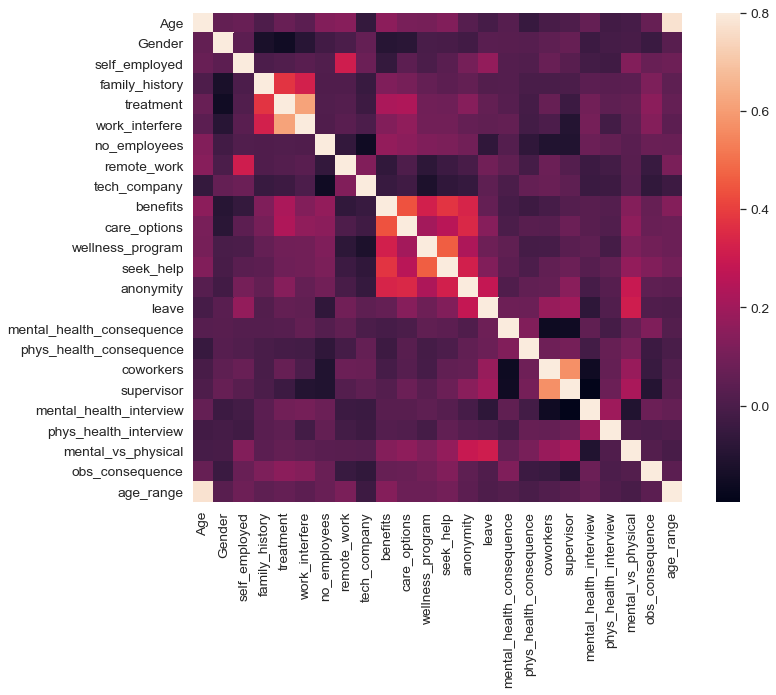

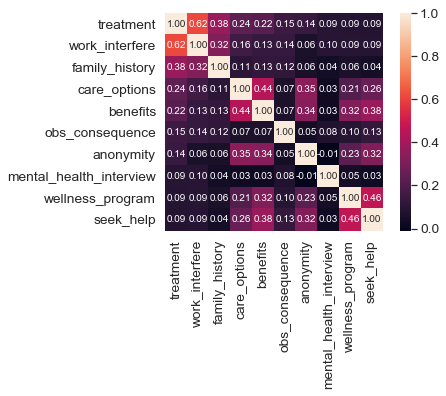

In [84]:

corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()


k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Text(0.5,0,'Age')

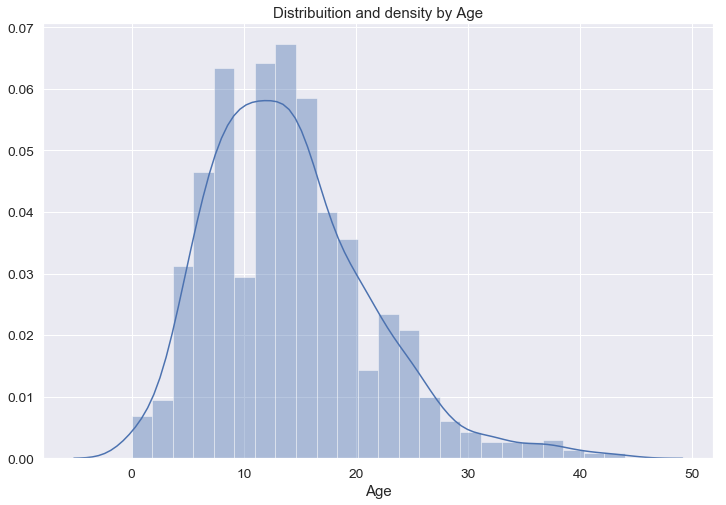

In [14]:

plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

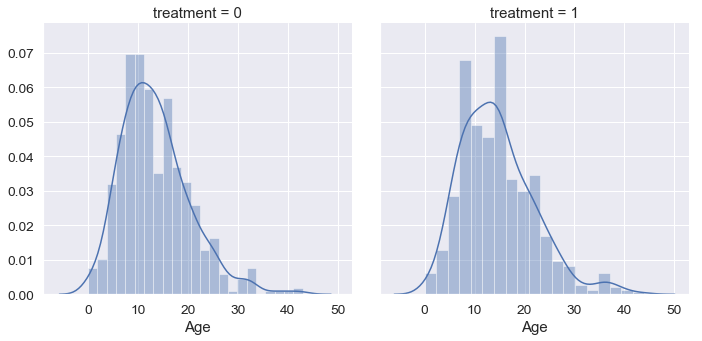

In [15]:

g = sns.FacetGrid(train_df, col='treatment', height=5)
g = g.map(sns.distplot, "Age")

Text(0.5,1,'Total Distribuition by treated or not')

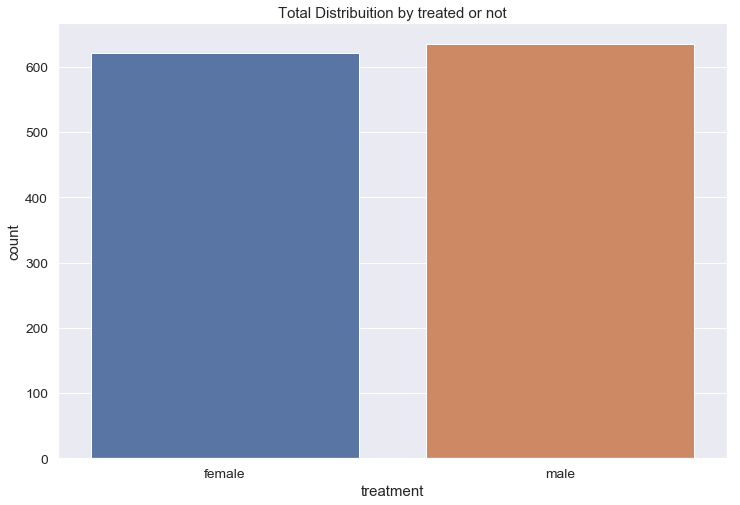

In [17]:

plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=train_df)
g.set_xticklabels(labels)
plt.title('Total Distribuition by treated or not')

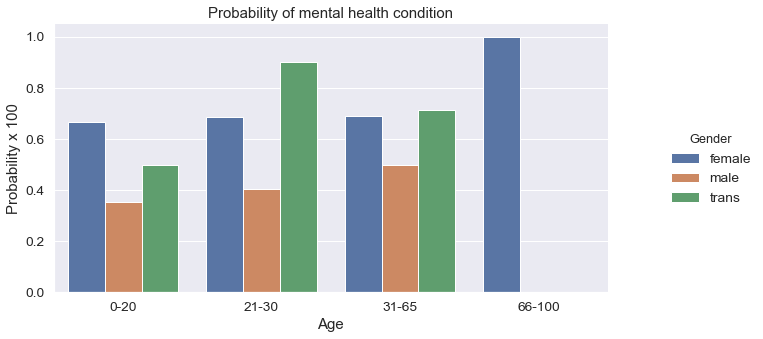

In [19]:
o = labelDict['label_age_range']

g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')


new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

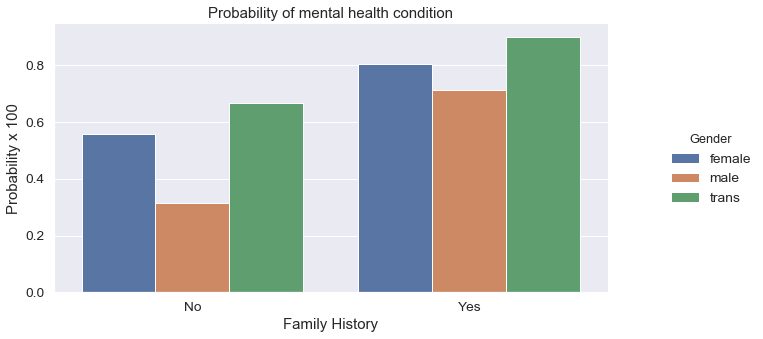

In [21]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')


new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

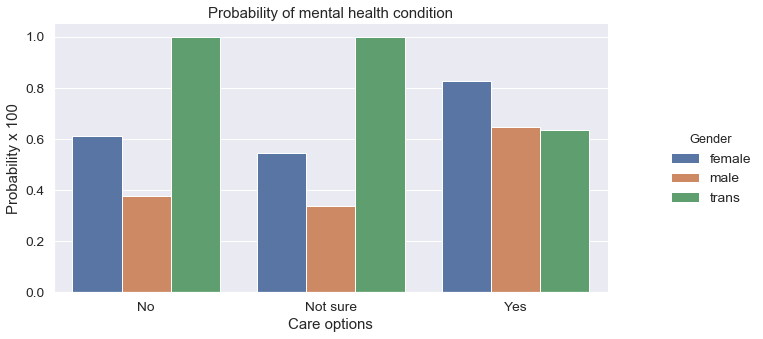

In [23]:
o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')


new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

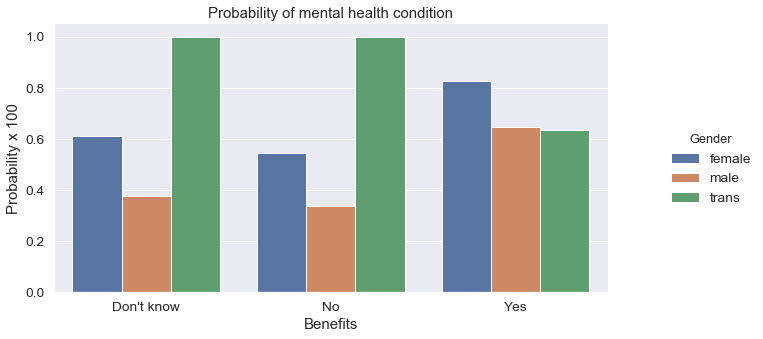

In [24]:
o = labelDict['label_benefits']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')


new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

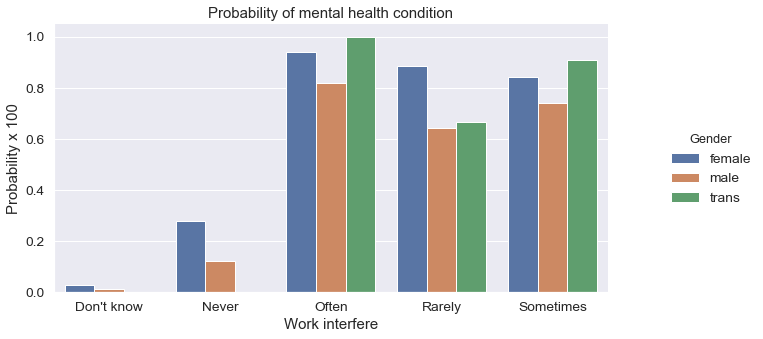

In [25]:
o = labelDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')


new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

In [26]:

scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,1,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,1,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,0,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [27]:

feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


methodDict = {}
rmseDict = ()

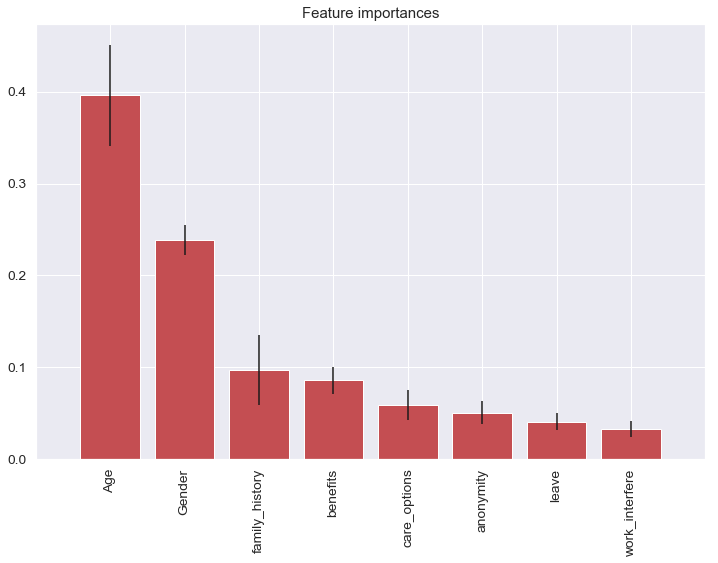

In [85]:

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    

plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [86]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    
    print('Null accuracy:\n', y_test.value_counts())
    
    
    print('Percentage of ones:', y_test.mean())
    
    
    print('Percentage of zeros:',1 - y_test.mean())
    
    
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
   
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
   
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
   
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
   
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    
    model.predict_proba(X_test)[0:10, 1]
    
    
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
       
        plt.rcParams['font.size'] = 12
       
        plt.hist(y_pred_prob, bins=8)
        
        
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    
   
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
   
    def evaluate_threshold(threshold):
       
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

In [31]:

def tuningCV(knn):
    
   
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [87]:
def tuningGridSerach(knn):
    
    k_range = list(range(1, 31))
    print(k_range)
    
    
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    
    grid.fit(X, y)
    
    
    grid.grid_scores_
    
    
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    
    
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [53]:
def logisticRegression():
    
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    
    methodDict['Log. Regres.'] = accuracy_score * 100

########### Logistic Regression ###############
Accuracy: 0.798941798941799
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


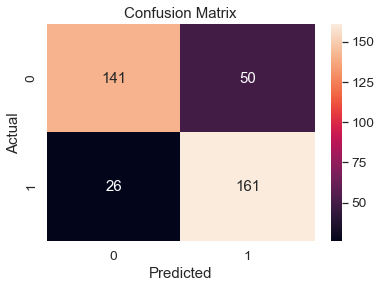

Classification Accuracy: 0.798941798941799
Classification Error: 0.20105820105820105
False Positive Rate: 0.2617801047120419
Precision: 0.7630331753554502
AUC Score: 0.799591231066439
Cross-validated AUC: 0.875357422875064
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 0 1]
First 10 predicted probabilities of class members:
 [[0.09763161 0.90236839]
 [0.95330977 0.04669023]
 [0.96013985 0.03986015]
 [0.78441354 0.21558646]
 [0.37834349 0.62165651]
 [0.06235819 0.93764181]
 [0.74803691 0.25196309]
 [0.1743978  0.8256022 ]
 [0.61145489 0.38854511]
 [0.49232517 0.50767483]]
First 10 predicted probabilities:
 [[0.90236839]
 [0.04669023]
 [0.03986015]
 [0.21558646]
 [0.62165651]
 [0.93764181]
 [0.25196309]
 [0.8256022 ]
 [0.38854511]
 [0.50767483]]


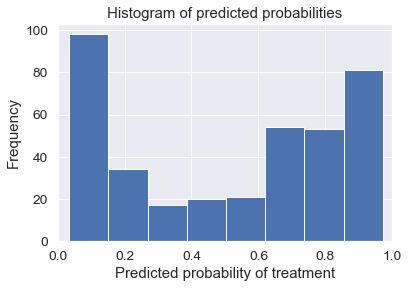

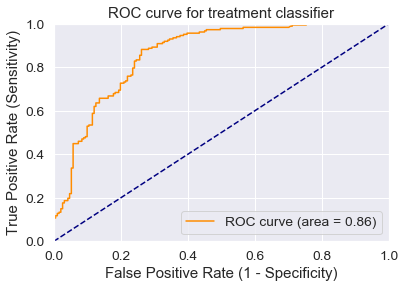

[[141  50]
 [ 26 161]]


In [88]:
logisticRegression()

In [37]:
def Knn():
   
    knn = KNeighborsClassifier(n_neighbors=5)
    
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
    
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    y_pred_class = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    methodDict['KNN'] = accuracy_score * 100


Rand. Best Score:  0.8194112967382657
Rand. Best Params:  {'weights': 'uniform', 'n_neighbors': 15}
[0.819, 0.819, 0.812, 0.814, 0.804, 0.818, 0.819, 0.815, 0.819, 0.815, 0.819, 0.82, 0.82, 0.818, 0.819, 0.814, 0.82, 0.814, 0.818, 0.818]
########### KNeighborsClassifier ###############
Accuracy: 0.8042328042328042
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


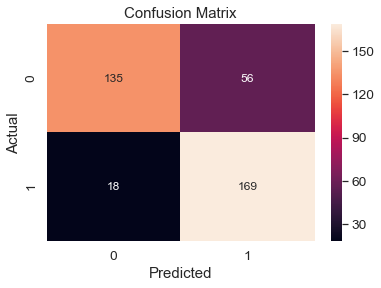

Classification Accuracy: 0.8042328042328042
Classification Error: 0.1957671957671958
False Positive Rate: 0.2931937172774869
Precision: 0.7511111111111111
AUC Score: 0.8052747991152673
Cross-validated AUC: 0.8788016433051714
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.37037037 0.62962963]
 [0.03703704 0.96296296]
 [0.59259259 0.40740741]
 [0.37037037 0.62962963]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]]
First 10 predicted probabilities:
 [[0.66666667]
 [0.        ]
 [0.        ]
 [0.33333333]
 [0.62962963]
 [0.96296296]
 [0.40740741]
 [0.62962963]
 [0.66666667]
 [0.66666667]]


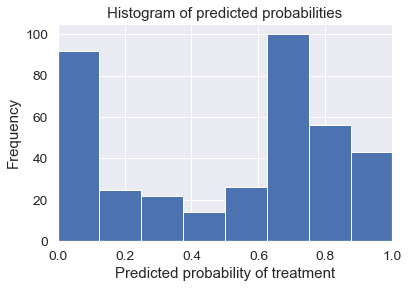

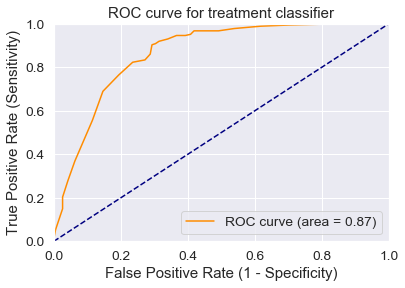

[[135  56]
 [ 18 169]]


In [38]:
Knn()

In [89]:
def randomForest():
    
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
    
   
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
   
    y_pred_class = my_forest.predict(X_test)
    
    print('########### Random Forests ###############')
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    
    methodDict['R. Forest'] = accuracy_score * 100

Rand. Best Score:  0.8305489260143198
Rand. Best Params:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 3}
[0.831, 0.831, 0.831, 0.833, 0.831, 0.831, 0.835, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.832, 0.832, 0.831, 0.831, 0.831, 0.831, 0.834]
########### Random Forests ###############
Accuracy: 0.8121693121693122
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


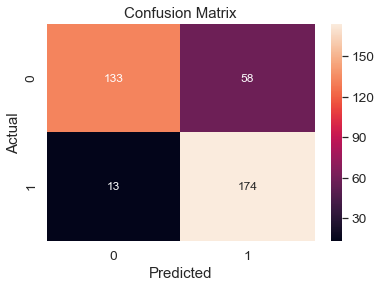

Classification Accuracy: 0.8121693121693122
Classification Error: 0.1878306878306878
False Positive Rate: 0.3036649214659686
Precision: 0.75
AUC Score: 0.8134081809782457
Cross-validated AUC: 0.8931609623015874
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.2555794  0.7444206 ]
 [0.95069083 0.04930917]
 [0.93851009 0.06148991]
 [0.87096597 0.12903403]
 [0.40653554 0.59346446]
 [0.17282958 0.82717042]
 [0.89450448 0.10549552]
 [0.4065912  0.5934088 ]
 [0.20540631 0.79459369]
 [0.19337644 0.80662356]]
First 10 predicted probabilities:
 [[0.7444206 ]
 [0.04930917]
 [0.06148991]
 [0.12903403]
 [0.59346446]
 [0.82717042]
 [0.10549552]
 [0.5934088 ]
 [0.79459369]
 [0.80662356]]


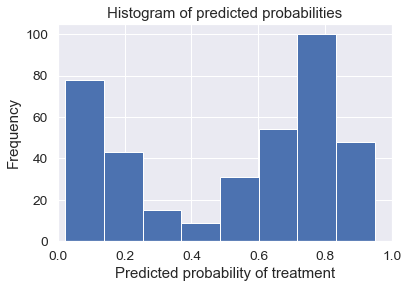

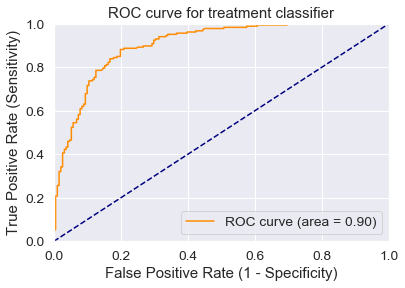

[[133  58]
 [ 13 174]]


In [90]:
randomForest()

In [58]:
import tensorflow as tf
#import argparse


batch_size = 100
train_steps = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

def train_input_fn(features, labels, batch_size):
 
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):

    features=dict(features)
    if labels is None:
  
        inputs = features
    else:
        inputs = (features, labels)

   
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    
    return dataset

In [59]:
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]

In [60]:
model = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                    hidden_units=[10, 10],
                                    optimizer=tf.train.ProximalAdagradOptimizer(
                                      learning_rate=0.1,
                                      l1_regularization_strength=0.001
                                    ))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\HARSHI~1\\AppData\\Local\\Temp\\tmpat2s2g96', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001DA8094E6A0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [61]:
model.train(input_fn=lambda:train_input_fn(X_train, y_train, batch_size), steps=train_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\HARSHI~1\AppData\Local\Temp\tmpat2s2g96\model.ckpt.
INFO:tensorflow:loss = 69.40861, step = 1
INFO:tensorflow:global_step/sec: 489.851
INFO:tensorflow:loss = 27.645441, step = 101 (0.206 sec)
INFO:tensorflow:global_step/sec: 721.343
INFO:tensorflow:loss = 31.676289, step = 201 (0.139 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 34.029903, step = 301 (0.142 sec)
INFO:tensorflow:global_step/sec: 777.267
INFO:tensorflow:loss = 29.093884, step = 401 (0.130 sec)
INFO:tensorflow:global_step/sec: 759.604
INFO:tensorflow:loss = 39.194183, step = 501 (0.131 sec)
INFO:tensorflow:global_step/sec: 716.193
INFO:tensorflow:loss = 29.177834, step = 601 (0.140 sec)
INFO:tensorflow:global_ste

In [91]:
eval_result = model.evaluate(
    input_fn=lambda:eval_input_fn(X_test, y_test, batch_size))

print('\nTest set accuracy: {accuracy:0.2f}\n'.format(**eval_result))

accuracy = eval_result['accuracy'] * 100
methodDict['NN DNNClasif.'] = accuracy

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-26-16:03:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HARSHI~1\AppData\Local\Temp\tmpat2s2g96\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-26-16:04:00
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7989418, accuracy_baseline = 0.505291, auc = 0.87560546, auc_precision_recall = 0.83542293, average_loss = 0.4584122, global_step = 1000, label/mean = 0.49470899, loss = 43.319954, precision = 0.73819745, prediction/mean = 0.5175448, recall = 0.9197861
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\HARSHI~1\AppData\Local\Temp\tmpat2s2g96\model.ckpt-1000

Test set accuracy: 0.80



In [46]:
predictions = list(model.predict(input_fn=lambda:eval_input_fn(X_train, y_train, batch_size=batch_size)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HARSHI~1\AppData\Local\Temp\tmps4tcvywr\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [47]:
template = ('\nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')

col1 = []
col2 = []
col3 = []


for idx, input, p in zip(X_train.index, y_train, predictions):
    v  = p["class_ids"][0] 
    class_id = p['class_ids'][0]
    probability = p['probabilities'][class_id] # Probability
    
    # Adding to dataframe
    col1.append(idx) # Index
    col2.append(v) # Prediction
    col3.append(input) # Expecter
    
   
    #print(template.format(idx, v, 100 * probability, input))


results = pd.DataFrame({'index':col1, 'prediction':col2, 'expected':col3})
results.head()

,index,prediction,expected
0,929,0,0
1,901,1,1
2,579,1,1
3,367,1,1
4,615,1,1


In [56]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

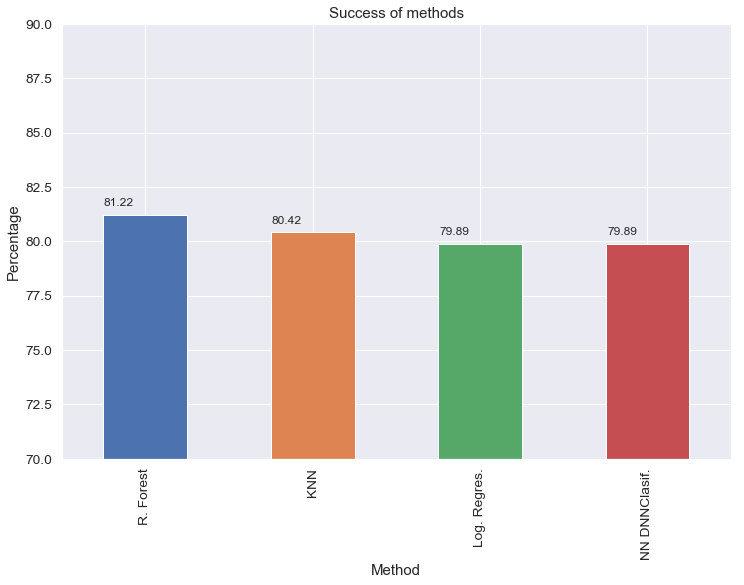

In [95]:
plotSuccess()

In [96]:
clf = RandomForestClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

results = pd.DataFrame({'Treatment': dfTestPredictions})

results.to_csv('results.csv', index=False)
results.head(20)

,Treatment
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1
